In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.0575


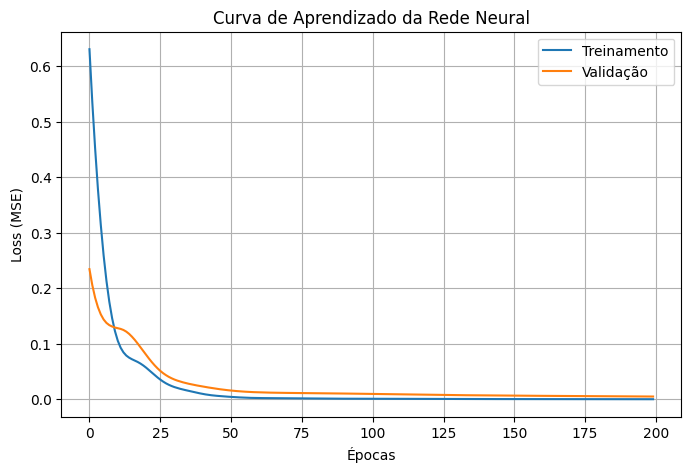

In [13]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar a rede neural no TensorFlow
modelo = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # Camada oculta 1
    layers.Dense(64, activation="relu"),  # Camada oculta 2
    layers.Dense(1)  # Saída (regressão)
])

# Compilar o modelo
modelo.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Treinar o modelo
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de perda (loss) durante o treinamento
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado da Rede Neural")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


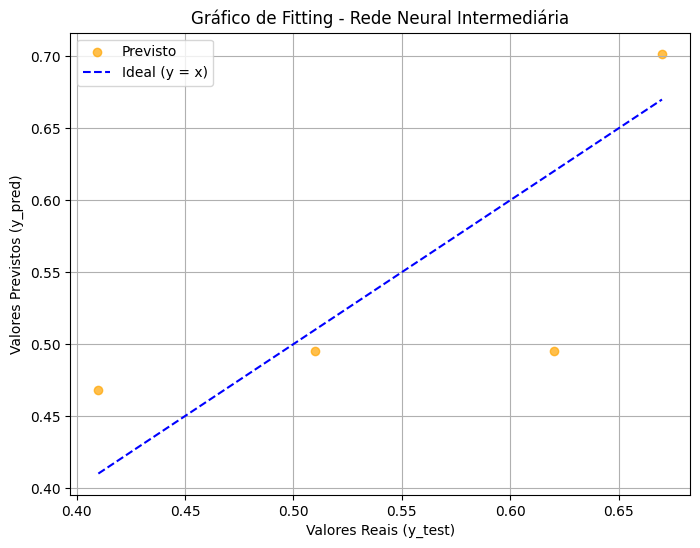

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Fazer previsões com o modelo treinado
y_pred = modelo.predict(X_test)

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label="Previsto", alpha=0.7, color="orange")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="--", label="Ideal (y = x)")
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Previstos (y_pred)")
plt.title("Gráfico de Fitting - Rede Neural Intermediária")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.1432


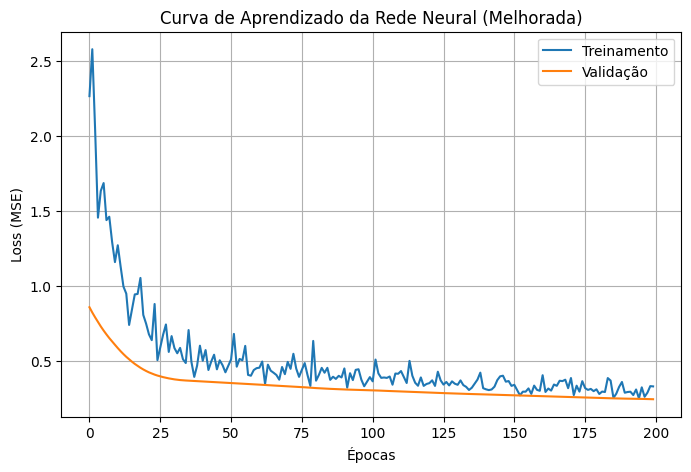

In [3]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar a rede neural melhorada
modelo = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),  # Regularização L2
    layers.Dropout(0.2),  # Dropout para evitar overfitting
    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),  # Camada oculta menor
    layers.Dropout(0.2),
    layers.Dense(1)  # Camada de saída
])

# Configurar o otimizador com taxa de aprendizado reduzida
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compilar o modelo
modelo.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Configurar Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)

# Treinar o modelo com Early Stopping
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[early_stop], verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de aprendizado com as melhorias aplicadas
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado da Rede Neural (Melhorada)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.2464


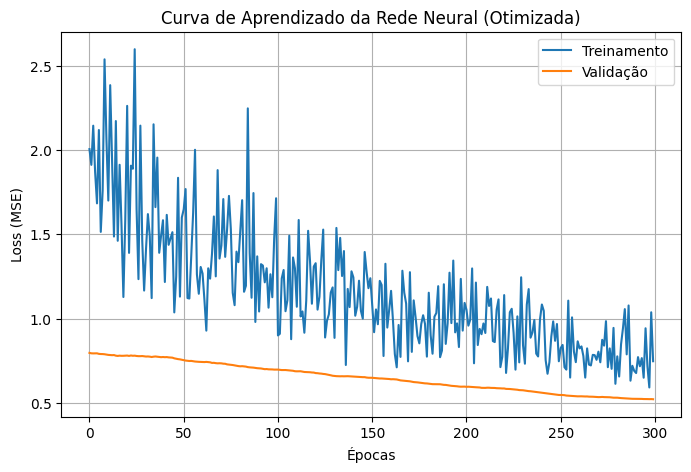

In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar a rede neural melhorada
modelo = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),  # Batch Normalization para estabilizar o treinamento
    layers.Dropout(0.2),

    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),  # Nova camada extra
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1)  # Camada de saída
])

# Configurar o otimizador com taxa de aprendizado reduzida
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar o modelo
modelo.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Configurar Early Stopping com patience maior
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)

# Treinar o modelo com Early Stopping
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, callbacks=[early_stop], verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de aprendizado com as melhorias aplicadas
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado da Rede Neural (Otimizada)")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.2734


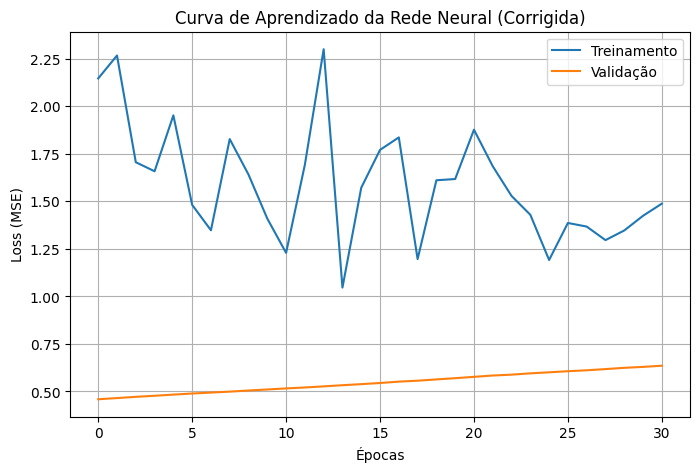

In [5]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar a rede neural melhorada
modelo = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.005), input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),  
    layers.Dropout(0.1),

    layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.005)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.005)),  
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(1)  # Camada de saída
])

# Configurar o otimizador com taxa de aprendizado reduzida
optimizer = keras.optimizers.Adam(learning_rate=0.0002)

# Compilar o modelo
modelo.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Configurar Early Stopping com patience maior
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)

# Treinar o modelo com Early Stopping
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, callbacks=[early_stop], verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de aprendizado com as melhorias aplicadas
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado da Rede Neural (Corrigida)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.4108


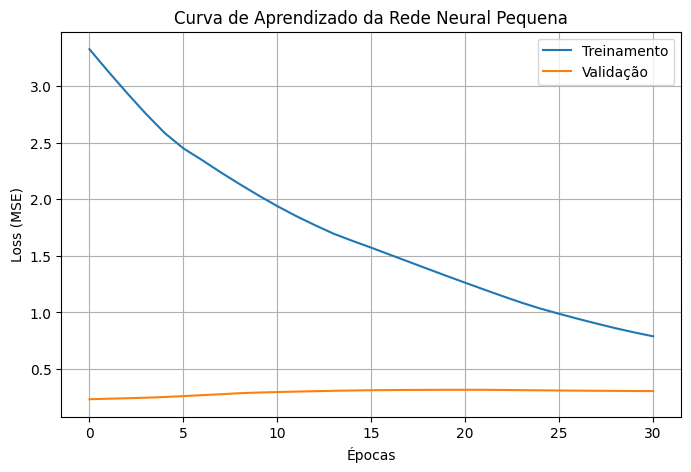

In [6]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar a rede neural menor
modelo = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),  # Primeira camada oculta com 16 neurônios
    layers.BatchNormalization(),  # Normalização para estabilidade

    layers.Dense(8, activation="relu"),  # Segunda camada com 8 neurônios
    layers.BatchNormalization(),

    layers.Dense(4, activation="relu"),  # Terceira camada com 4 neurônios
    layers.BatchNormalization(),

    layers.Dense(1)  # Camada de saída
])

# Configurar o otimizador com taxa de aprendizado ajustada
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compilar o modelo
modelo.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Configurar Early Stopping para evitar overfitting
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)

# Treinar o modelo com Early Stopping
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stop], verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de aprendizado com as melhorias aplicadas
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado da Rede Neural Pequena")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.1717


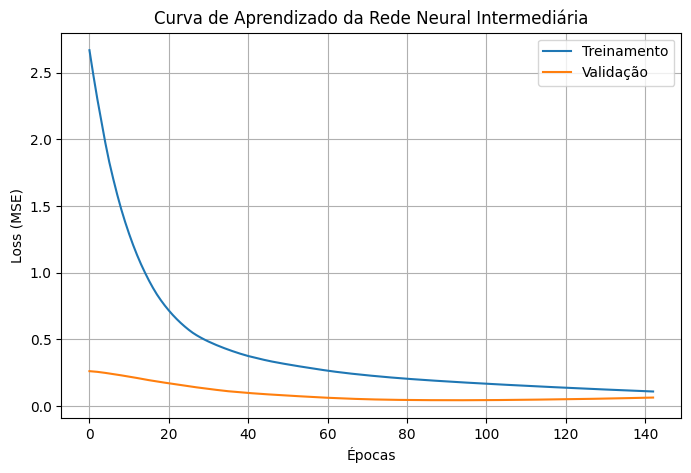

In [7]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar a rede neural intermediária
modelo = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),  
    layers.BatchNormalization(),

    layers.Dense(16, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(8, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(1)  # Camada de saída
])

# Configurar o otimizador com taxa de aprendizado ajustada
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar o modelo
modelo.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Configurar Early Stopping para permitir mais tempo de aprendizado
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)

# Treinar o modelo com Early Stopping
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stop], verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de aprendizado com as melhorias aplicadas
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado da Rede Neural Intermediária")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


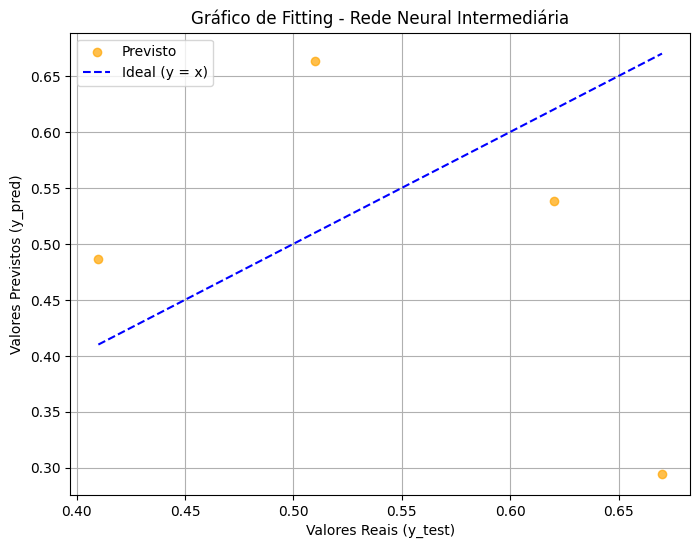

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fazer previsões com o modelo treinado
y_pred = modelo.predict(X_test)

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label="Previsto", alpha=0.7, color="orange")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="--", label="Ideal (y = x)")
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Previstos (y_pred)")
plt.title("Gráfico de Fitting - Rede Neural Intermediária")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\audec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Erro Médio Absoluto (MAE): 0.7967


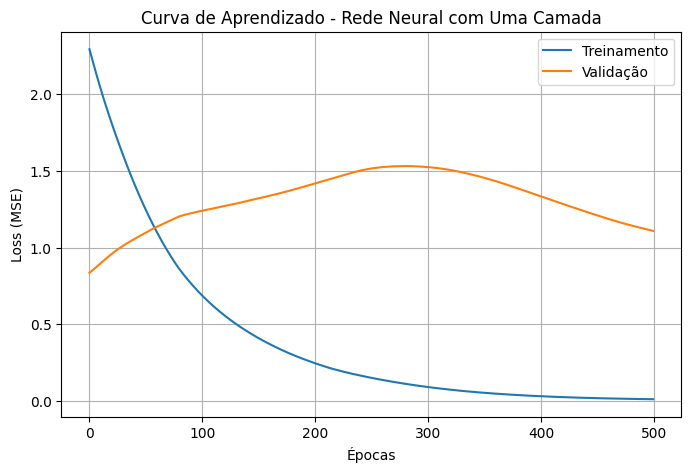

In [12]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carregar os dados do arquivo Excel
excel_path = "Tabela desnormalizada.xlsx"  # Substituir pelo caminho correto
dados = pd.read_excel(excel_path)

# Remover a coluna 'Ensaio' (não é uma variável preditora)
dados = dados.drop(columns=["Ensaio"])

# Definir X (features) e y (variável alvo)
X = dados.drop(columns=["Produtividade global em etanol (g/(L.h))"])
y = dados["Produtividade global em etanol (g/(L.h))"]

# Normalizar os dados (padronização: média 0, desvio 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Criar a rede neural com apenas uma camada oculta
modelo = keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),  
    layers.BatchNormalization(),

    layers.Dense(1)  # Camada de saída
])

# Configurar o otimizador com taxa de aprendizado ajustada
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar o modelo
modelo.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Configurar Early Stopping para evitar overfitting
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", restore_best_weights=True)

# Treinar o modelo com Early Stopping
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

# Avaliação do modelo
resultados = modelo.evaluate(X_test, y_test, verbose=0)
print(f"Erro Médio Absoluto (MAE): {resultados[1]:.4f}")

# Plotar a curva de aprendizado com as melhorias aplicadas
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treinamento")
plt.plot(historico.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Loss (MSE)")
plt.title("Curva de Aprendizado - Rede Neural com Uma Camada")
plt.legend()
plt.grid(True)
plt.show()
